In [30]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import scipy.stats as ss

In [31]:
def compute_file():


    df = pd.read_csv(dir_path + file +'.csv')
    df.head()


    df.columns

    df_copy = df.copy()

    df.columns


    str_list = [] # empty list to contain columns with strings (words)
    for colname, colvalue in df.iteritems():
        if type(colvalue[1]) == str:
            str_list.append(colname)
    # Get to the numeric columns by inversion            
    num_list = df.columns.difference(str_list) 
    # Create Dataframe containing only numerical features
    df_num = df[num_list]
    f, ax = plt.subplots(figsize=(16, 12))
    plt.title('Pearson Correlation of features')
    # Draw the heatmap using seaborn
    #sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
    sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)




    # target_column = 'latestPrice'

    # First extract the target variable which is our df prices
    Y = df_copy[target_column]
    # Drop price from the df dataframe and create a matrix out of the df data
    df_copy = df_copy.drop([target_column], axis=1)
    X = df_copy.values
    # Store the column/feature names into a list "colnames"
    colnames = df_copy.columns




    ranks = {}
    def ranking(ranks, names, order=1):
        minmax = MinMaxScaler()
        ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
        ranks = map(lambda x: round(x,2), ranks)
        return dict(zip(names, ranks))



    colnames = df_copy.columns


    rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
    rf.fit(X,Y)
    ranks["RF"] = ranking(rf.feature_importances_, colnames)




    # Create empty dictionary to store the mean value calculated from all the scores
    r = {}

    methods = ['RF']
    for name in colnames:
        r[name] = round(np.mean([ranks[method][name] 
                                for method in methods]), 2)
    
    methods = sorted(methods)
    ranks["Mean"] = r
    methods.append("Mean")
    
    print("\t%s" % "\t".join(methods))
    for name in colnames:
        print("%s\t%s" % (name, "\t".join(map(str, 
                            [ranks[method][name] for method in methods]))))




    ranklist = []
    for item in r.items():
        ranklist.append(item)



    ranklist.sort(key=lambda a: a[1])
    print(ranklist)




    df_rank= pd.DataFrame(ranklist,columns=['feature_name','feature_score_rf'])
    df_rank.columns
    df_rank['feature_rank'] = df_rank['feature_score_rf'].rank(method='min', ascending=False)
    df_rank['method'] = 'Random_forest'
    df_rank['dataset'] = dataset_name
    df_rank = df_rank[['feature_name', 'method', 'feature_rank', 'dataset']]


    file_name = '../data/RANDOM_FOREST/featureranks_'+ file +'_randomforest.csv'
    df_rank.to_csv(file_name, sep=';',index=False)



    #Put the mean scores into a Pandas dataframe
    meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

    # Sort the dataframe
    meanplot = meanplot.sort_values('Mean Ranking', ascending=False)


    sns.catplot(x="Mean Ranking", y="Feature", kind="bar", data=meanplot)


    return df_rank




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s


building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


	RF	Mean
zipcode	0.18	0.18
latitude	0.12	0.12
longitude	0.12	0.12
propertyTaxRate	0.0	0.0
garageSpaces	0.01	0.01
hasAssociation	0.02	0.02
hasGarage	0.0	0.0
hasSpa	0.0	0.0
hasView	0.0	0.0
homeType	0.01	0.01
parkingSpaces	0.0	0.0
yearBuilt	0.08	0.08
numPriceChanges	0.04	0.04
numOfAppliances	0.02	0.02
numOfParkingFeatures	0.01	0.01
numOfPatioAndPorchFeatures	0.01	0.01
numOfSecurityFeatures	0.01	0.01
numOfWindowFeatures	0.0	0.0
lotSizeSqFt	0.01	0.01
livingAreaSqFt	1.0	1.0
avgSchoolDistance	0.04	0.04
avgSchoolRating	0.09	0.09
avgSchoolSize	0.06	0.06
MedianStudentsPerTeacher	0.01	0.01
numOfBathrooms	0.15	0.15
numOfBedrooms	0.02	0.02
numOfStories	0.01	0.01
[('propertyTaxRate', 0.0), ('hasGarage', 0.0), ('hasSpa', 0.0), ('hasView', 0.0), ('parkingSpaces', 0.0), ('numOfWindowFeatures', 0.0), ('garageSpaces', 0.01), ('homeType', 0.01), ('numOfParkingFeatures', 0.01), ('numOfPatioAndPorchFeatures', 0.01), ('numOfSecurityFeatures', 0.01), ('lotSizeSqFt', 0.01), ('MedianStudentsPerTeacher', 0.01), 

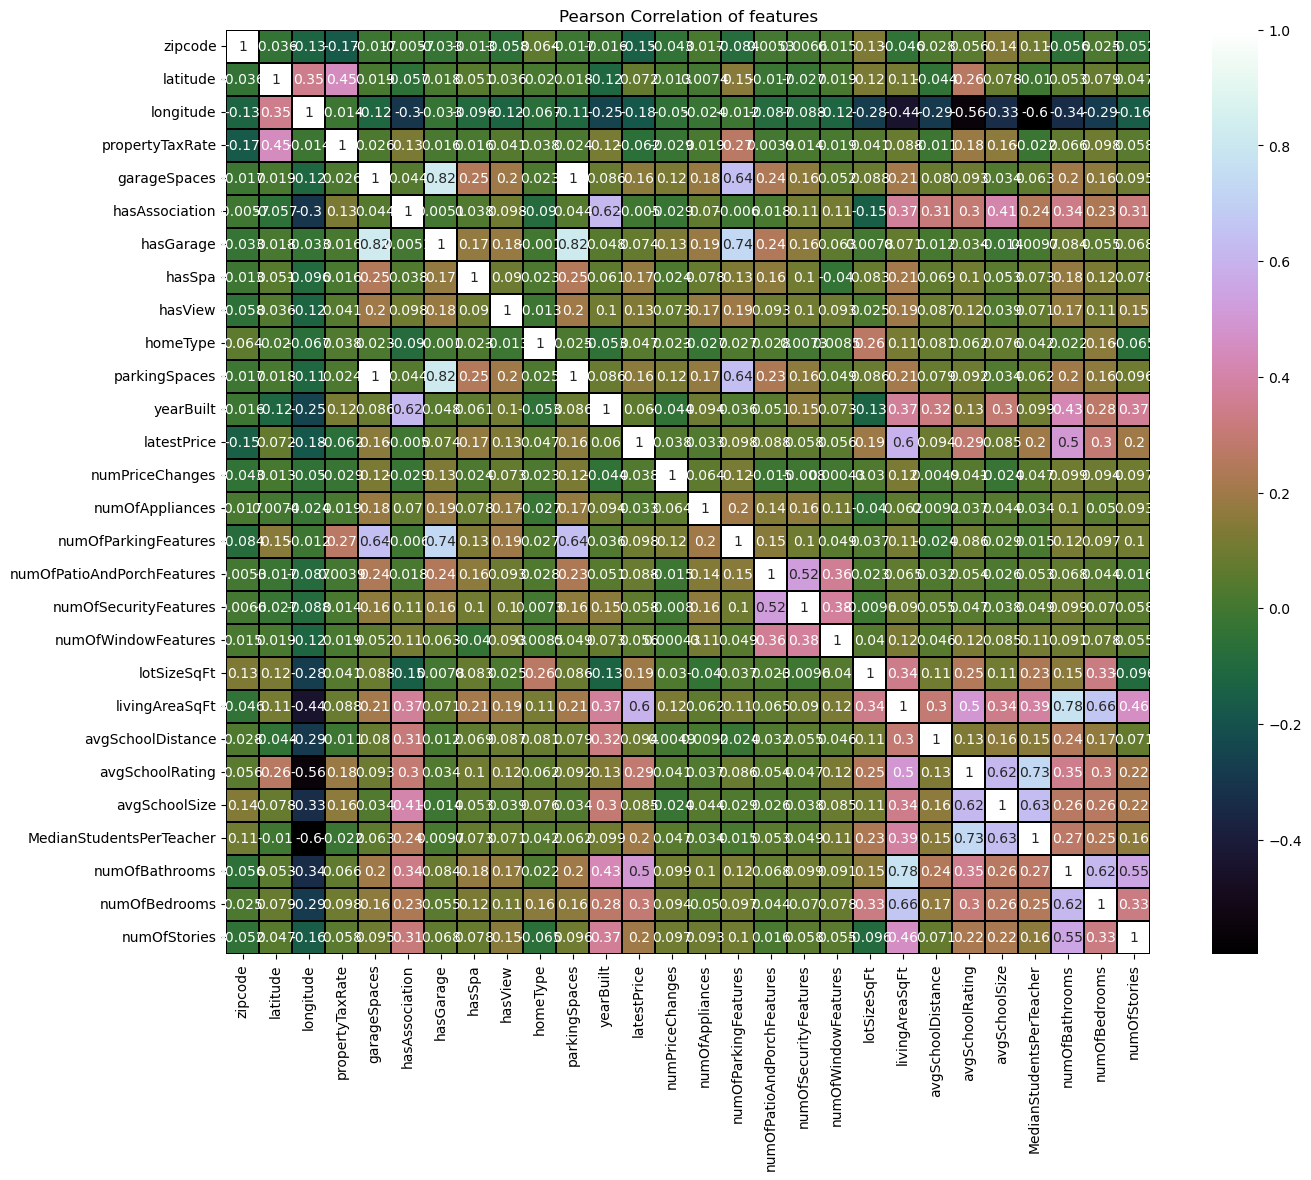

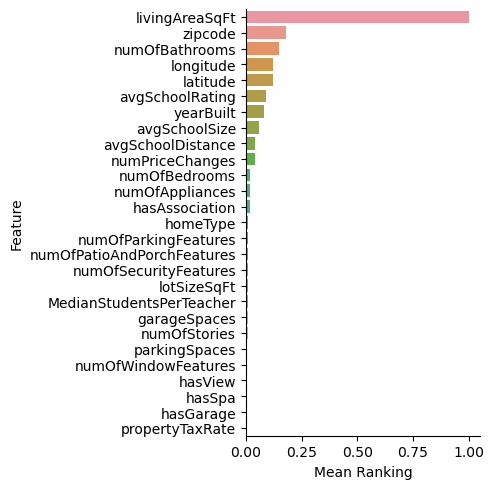

In [32]:
dir_path = '../datasets/austin_housing/'

target_column = 'latestPrice'

dataset_name = 'austin_housing'

file = 'processed_austin_housing'

austin = compute_file()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


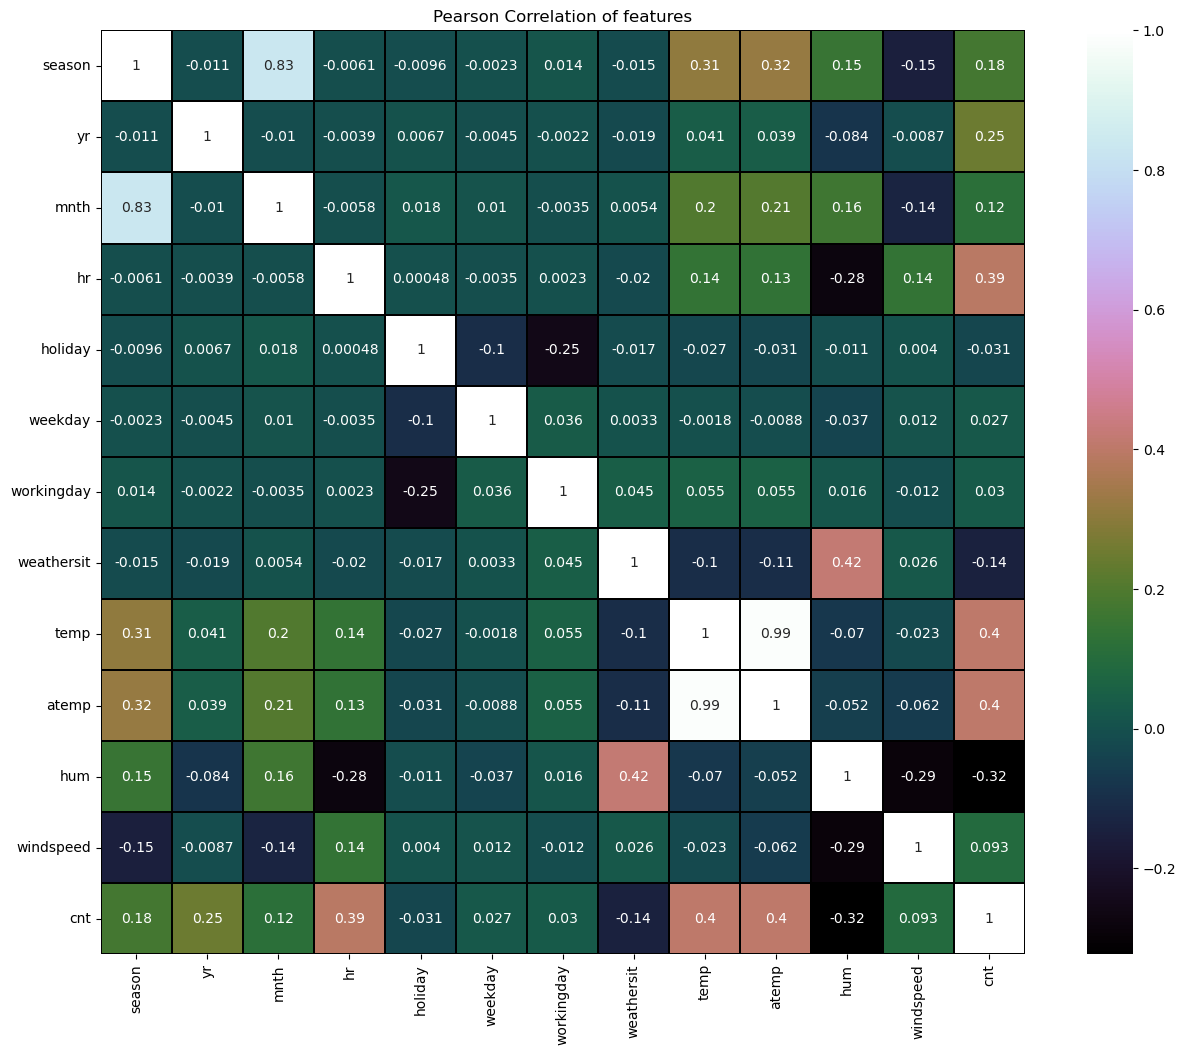

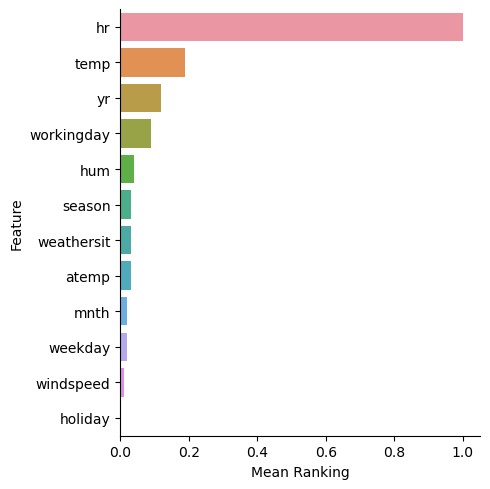

In [33]:
dir_path = '../datasets/Bike Sharing/'

target_column = 'cnt'

dataset_name = 'Bike_sharing'

file = 'preprocessed_hour'

bike = compute_file()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.5s finished


	RF	Mean
property_type	0.04	0.04
room_type	1.0	1.0
amenities	0.15	0.15
accommodates	0.09	0.09
bathrooms	0.33	0.33
bed_type	0.01	0.01
cancellation_policy	0.03	0.03
cleaning_fee	0.02	0.02
city	0.02	0.02
host_has_profile_pic	0.0	0.0
host_identity_verified	0.02	0.02
instant_bookable	0.02	0.02
latitude	0.31	0.31
longitude	0.36	0.36
number_of_reviews	0.1	0.1
review_scores_rating	0.05	0.05
bedrooms	0.07	0.07
beds	0.02	0.02
[('host_has_profile_pic', 0.0), ('bed_type', 0.01), ('cleaning_fee', 0.02), ('city', 0.02), ('host_identity_verified', 0.02), ('instant_bookable', 0.02), ('beds', 0.02), ('cancellation_policy', 0.03), ('property_type', 0.04), ('review_scores_rating', 0.05), ('bedrooms', 0.07), ('accommodates', 0.09), ('number_of_reviews', 0.1), ('amenities', 0.15), ('latitude', 0.31), ('bathrooms', 0.33), ('longitude', 0.36), ('room_type', 1.0)]


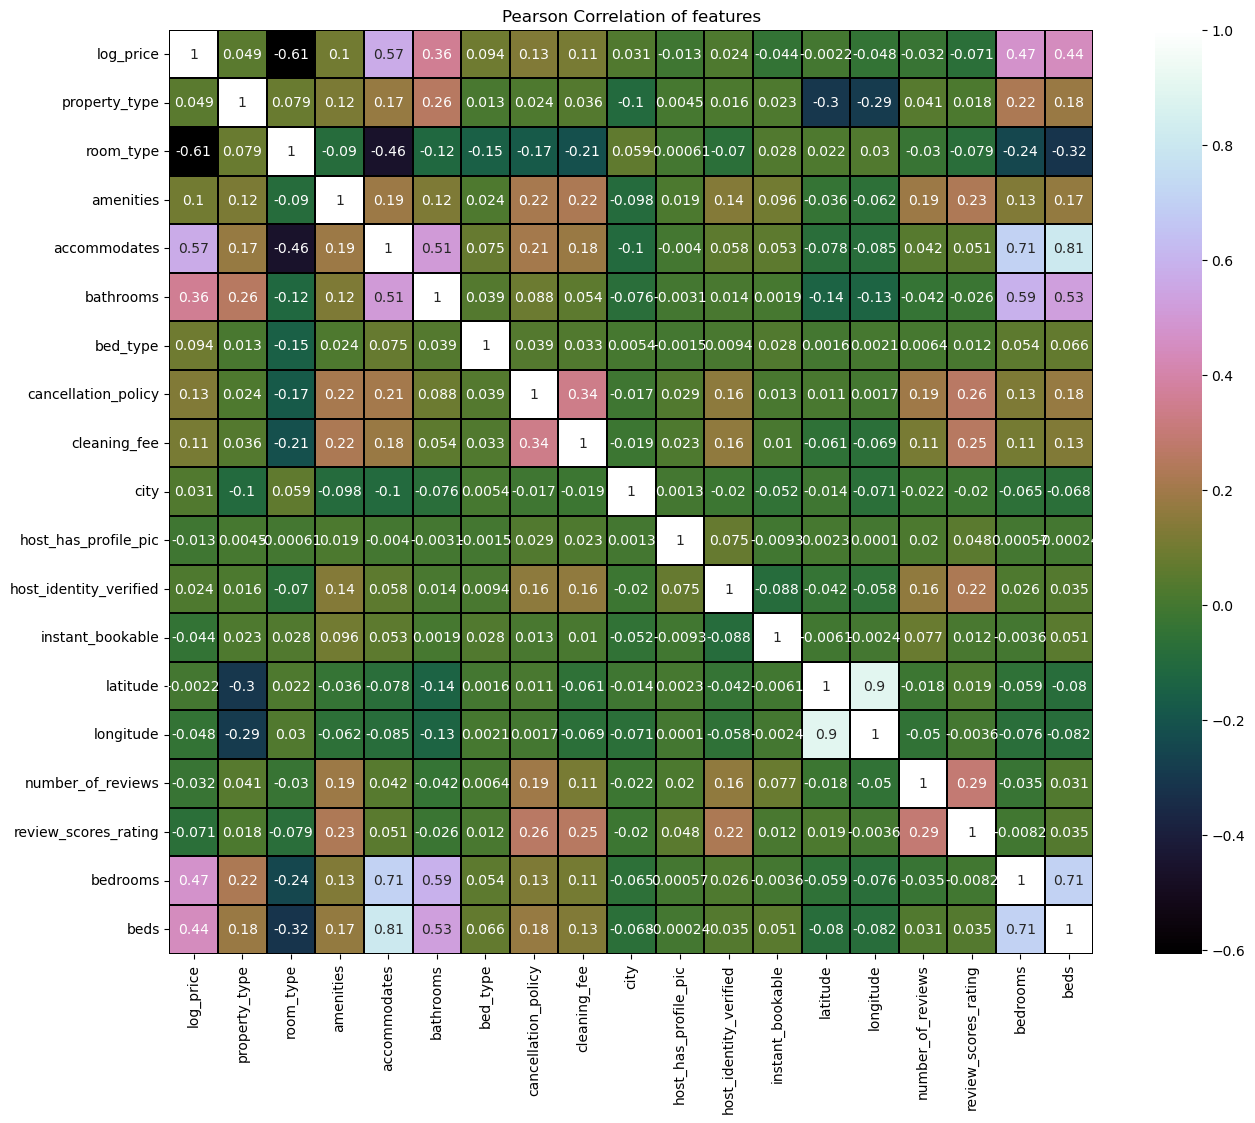

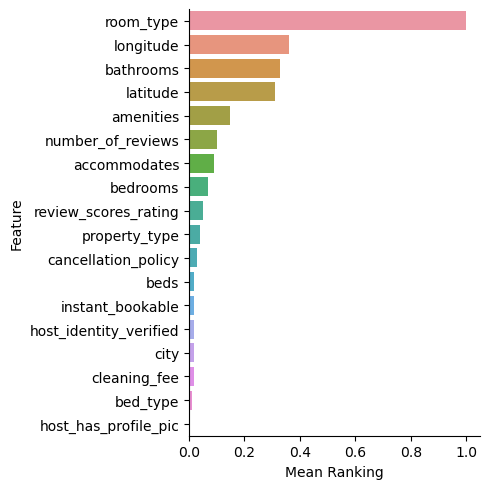

In [34]:
dir_path = '../datasets/Airbnb_price/'
target_column = 'log_price'



dataset_name = 'Airbnb_price'

file = 'data_Airbnb_preprocessed'

airbnb = compute_file()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s


building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


	RF	Mean
EPA Fuel Economy Est - City (MPG)	0.01	0.01
Engine	0.0	0.0
Drivetrain	0.0	0.0
Passenger Capacity	0.01	0.01
Passenger Doors	0.0	0.0
Wheelbase (in)	0.04	0.04
SAE Net Torque @ RPM	0.05	0.05
Fuel System	0.0	0.0
SAE Net Horsepower @ RPM	1.0	1.0
Displacement	0.1	0.1
Trans Description Cont.	0.0	0.0
Trans Type	0.0	0.0
Air Bag-Side Head-Front	0.0	0.0
Air Bag-Side Head-Rear	0.0	0.0
Child Safety Rear Door Locks	0.0	0.0
Daytime Running Lights	0.0	0.0
Traction Control	0.01	0.01
Night Vision	0.0	0.0
Rollover Protection Bars	0.0	0.0
Basic Miles/km	0.64	0.64
Basic Years	0.0	0.0
Corrosion Miles/km	0.0	0.0
Corrosion Years	0.0	0.0
Drivetrain Miles/km	0.01	0.01
Drivetrain Years	0.02	0.02
Turning Diameter - Curb to Curb (ft)	0.01	0.01
Front Wheel Material	0.01	0.01
Roadside Assistance Miles/km	0.0	0.0
Manufacturer	0.04	0.04
Model year	0.01	0.01
Category	0.0	0.0
Front tire width	0.01	0.01
Front tire aspect ratio	0.01	0.01
Front tire rim size	0.01	0.01
[('Engine', 0.0), ('Drivetrain', 0.0), ('Passen

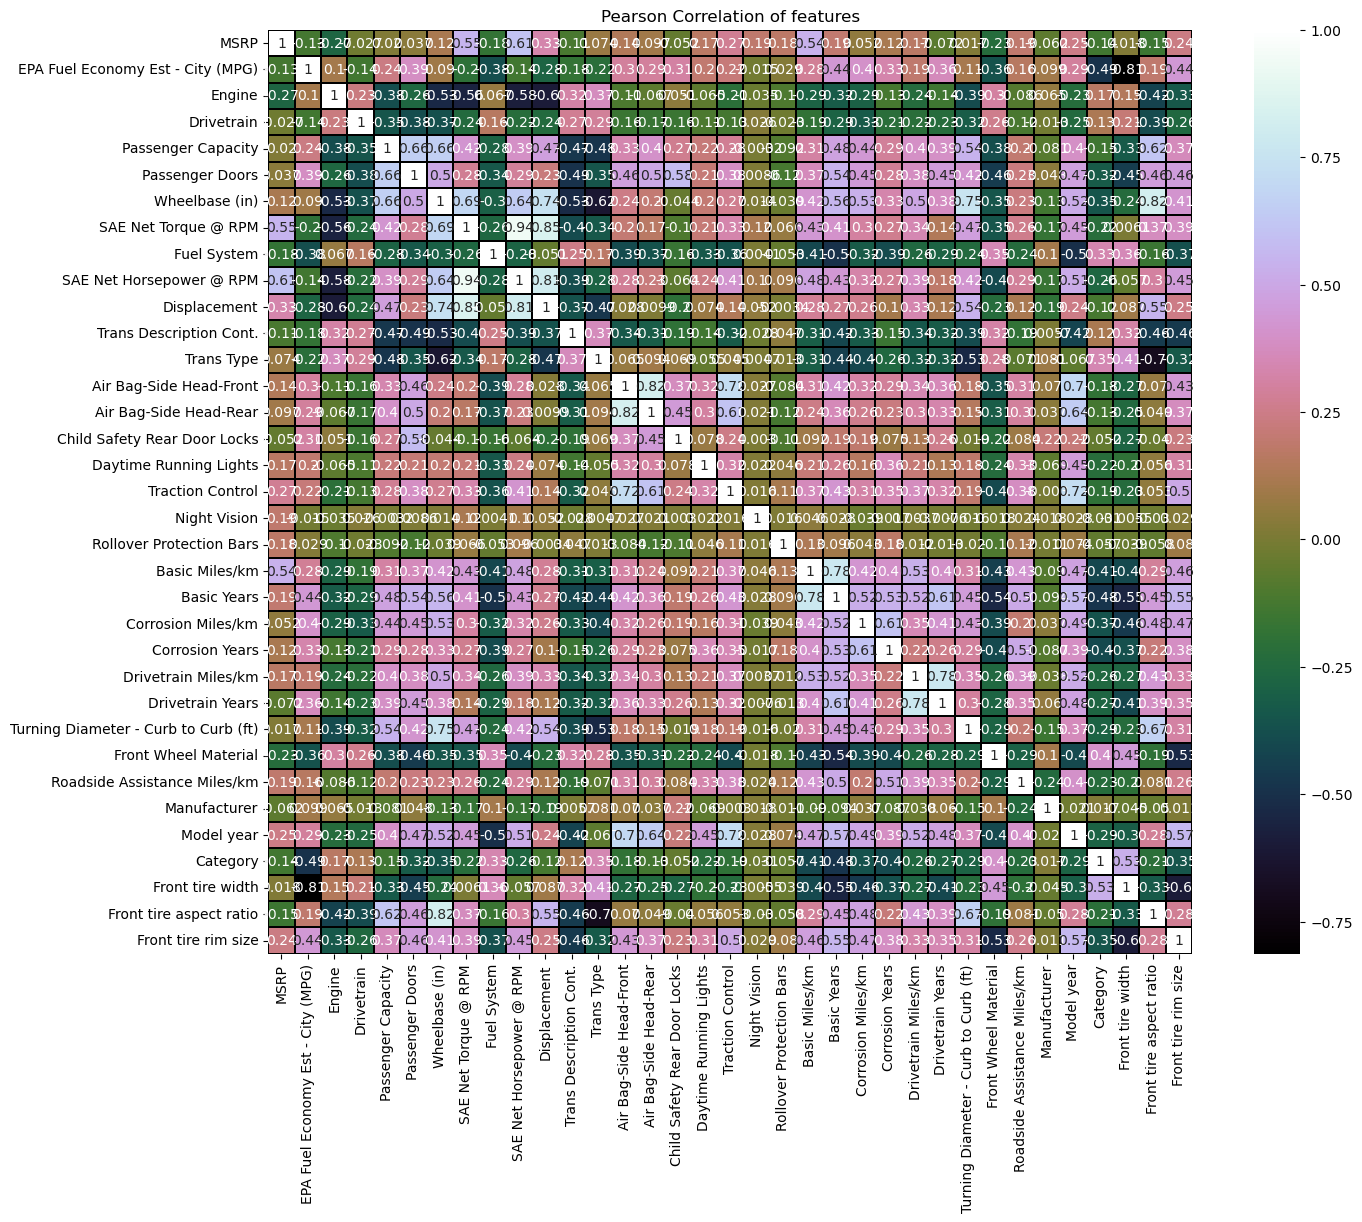

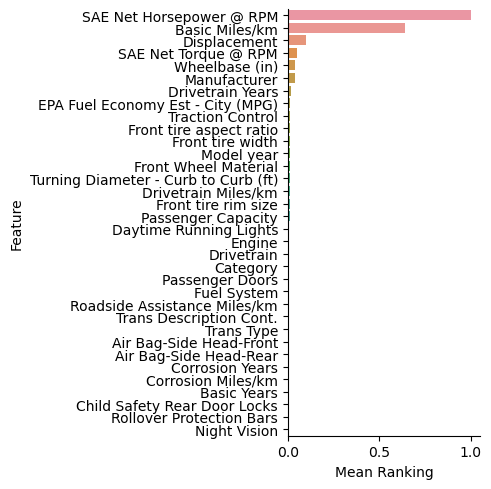

In [35]:
dir_path = '../datasets/cars/'


target_column = 'MSRP'

dataset_name = 'cars'

file = 'New_cars_preprocessed'


cars = compute_file()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

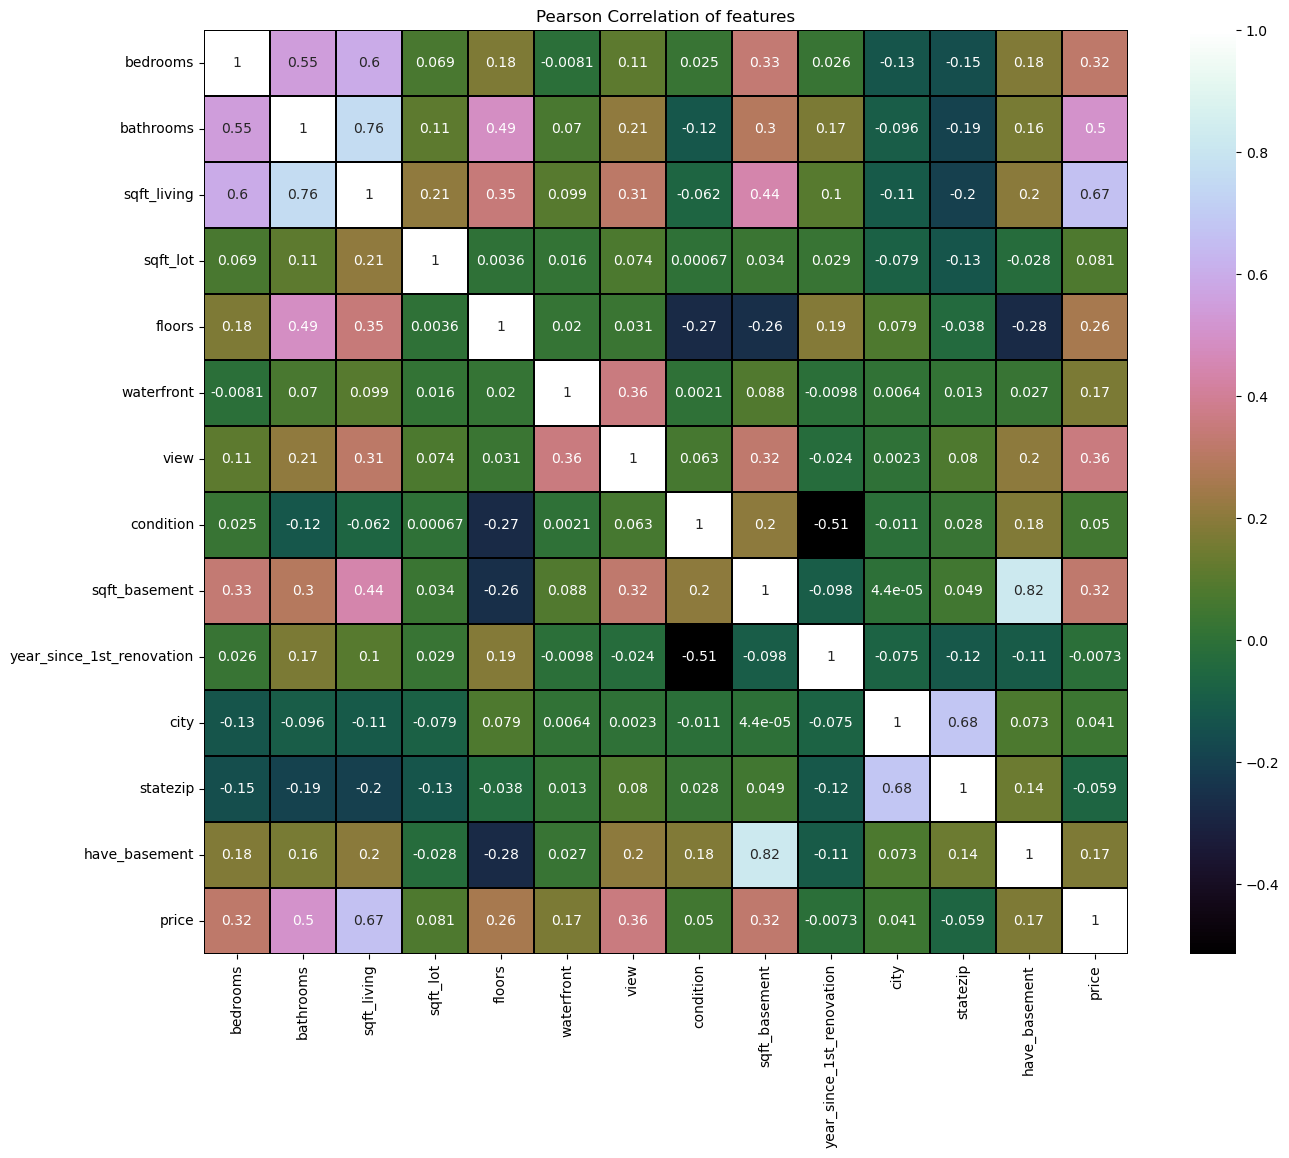

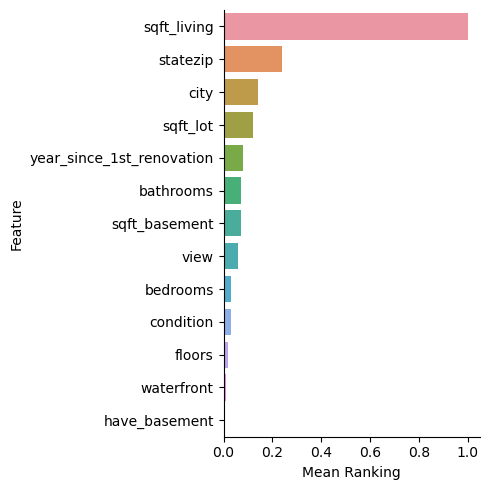

In [36]:
dir_path = '../datasets/USA_houseprices_2014/'
target_column = 'price'



dataset_name = 'USA_houseprices_2014'

file = 'preprocessed_data_USAhouseprices2014'
USAHouse = compute_file()

In [37]:

frames = [USAHouse, austin, airbnb, cars, bike]

all_df = pd.concat(frames)
all_df


all_df.to_csv('../data/featureranks_randomforest.csv', sep=';',index=False)

In [38]:

# # Construct our Linear Regression model
# lr = LinearRegression(

    
# )
# lr.fit(X,Y)
# #stop the search when only the last feature is left
# rfe = RFE(lr, n_features_to_select=1, verbose =3 )
# rfe.fit(X,Y)
# ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)